## Support Vector Regression Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
## lets creat synthetic data points for our model
from sklearn.datasets import make_regression
X,y = make_regression(n_samples = 1000, n_features = 2, n_targets=1,noise = 3.0)

In [4]:
X

array([[ 2.52616283, -2.07793033],
       [ 0.08674779, -0.68264026],
       [ 0.03855307, -0.67037506],
       ...,
       [-1.09406255,  0.29582218],
       [-0.25196296,  0.1384589 ],
       [ 2.08663013, -0.38153336]])

In [5]:
y

array([ 7.92598880e+01, -8.93834133e+00, -7.48124478e+00, -3.07443685e+01,
       -3.51300334e+00, -3.34149613e+01, -7.49921710e+01, -3.80109054e+01,
        4.77360784e+01,  2.60565627e+00,  1.31602757e+01, -5.34064209e+01,
       -4.02224445e+01,  5.48423047e+01, -3.09574869e+01, -5.66884357e+01,
        3.76208266e+01, -9.99159329e+00, -7.46049059e-01, -3.55173135e+01,
       -2.86495942e+01,  1.35085679e+01, -2.75569400e+01,  1.82456600e+01,
       -3.78918164e+00, -4.61333271e+01, -5.28342646e+01, -2.80089390e+01,
        1.85181869e+00, -3.29582397e+01,  6.70063931e+00,  2.68682413e+01,
        3.42501746e+01,  3.66223318e+01,  1.12657718e+02,  4.19248717e+01,
        3.25463448e+01,  5.46851018e+01, -8.10023303e+00, -6.48526062e+01,
       -6.97602729e+01,  1.72405184e+01, -8.82196344e+00, -1.52381742e+01,
        7.84470546e+01,  7.01699118e+01, -6.14296971e+01, -5.92099020e+00,
        3.90341566e-01,  4.27325033e+01, -1.52568225e+01, -4.85085633e+01,
       -2.43094765e+01, -

In [6]:
pd.DataFrame(X)[0]

0      2.526163
1      0.086748
2      0.038553
3     -0.942465
4     -0.179445
         ...   
995   -0.773822
996   -0.777062
997   -1.094063
998   -0.251963
999    2.086630
Name: 0, Length: 1000, dtype: float64

In [8]:
pd.DataFrame(X)[1]

0     -2.077930
1     -0.682640
2     -0.670375
3      0.335252
4      0.305188
         ...   
995    1.189865
996    0.626673
997    0.295822
998    0.138459
999   -0.381533
Name: 1, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

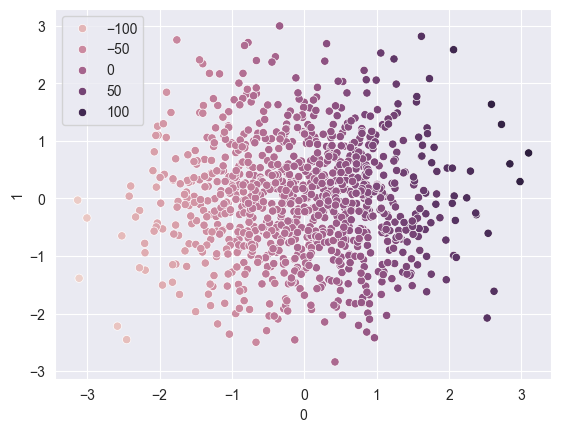

In [7]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [11]:
from sklearn.svm import SVR

In [13]:
svr = SVR(kernel = 'linear')

In [14]:
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [15]:
svr.coef_

array([[38.23181124,  7.58110778]])

In [16]:
svr.intercept_

array([-0.13695115])

In [17]:
## Predcition
y_pred = svr.predict(X_test)

In [18]:
y_pred

array([  23.66507075,   48.4944498 ,  -41.50144262,  -15.52361728,
         28.26888349,    4.99682788,   11.57999019,  -18.04129291,
        -54.98203604,   13.44753636,   23.4310421 ,  -20.58083457,
         42.71112278,   20.9629865 ,  -11.27484276,  -62.88918367,
          0.55149826,  -62.4886942 ,  -36.75042314,    9.95359267,
         18.32679435,   87.84789192,  -51.55398329,   42.93230055,
        -55.93995169,   32.6086372 ,  -24.1266592 ,  -25.30516259,
        -13.46364884,   35.46761698,   18.20316762,   59.77687263,
         23.25165802,   -0.44301895,   48.4586688 ,  -28.46381547,
        -22.86024729,   28.54822545,   -3.13416392,  -11.74756334,
         34.17132659,   23.56083867,   50.18705731,  -24.23116391,
        -37.07672615,    7.36857312,   -8.22450376,   15.48105935,
        -76.83738211,   -1.27519204,  -27.74835974,  -29.74376414,
        -24.64804697,   21.44248277,  -20.64144077,    8.21072414,
        -78.74576205,   54.79009675,   26.8574395 ,  -31.26903

In [19]:
from sklearn.metrics import r2_score

In [20]:
r2_score(y_test, y_pred)

0.9933897125125066

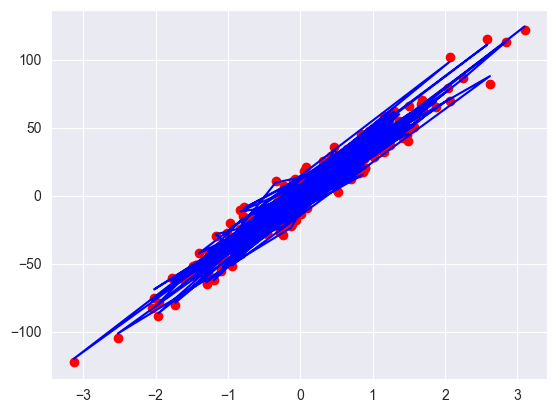

In [21]:
## Lets plot the regression line
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], y_pred, color = 'blue')
plt.show()


## Hyperparameter tuning with SVR

In [24]:
from sklearn.model_selection import GridSearchCV

## defining the model
param_grid = {
            'C': [0.1, 1, 10, 100, 1000], 
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
            'kernel': ['linear'],
            'epsilon': [0.1,0.2,0.3]
              }

In [25]:
grid = GridSearchCV(SVR(),param_grid = param_grid,cv= 5,refit=True,verbose = 3, )

In [26]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.988 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.989 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [27]:
grid.best_params_

{'C': 100, 'epsilon': 0.2, 'gamma': 1, 'kernel': 'linear'}

In [28]:
grid.best_estimator_

SVR(C=100, epsilon=0.2, gamma=1, kernel='linear')

In [29]:
##Predcition
y_pred = grid.predict(X_test)
print(r2_score(y_test, y_pred))

0.9934120374894584


In [30]:
## Lets plot the regression line

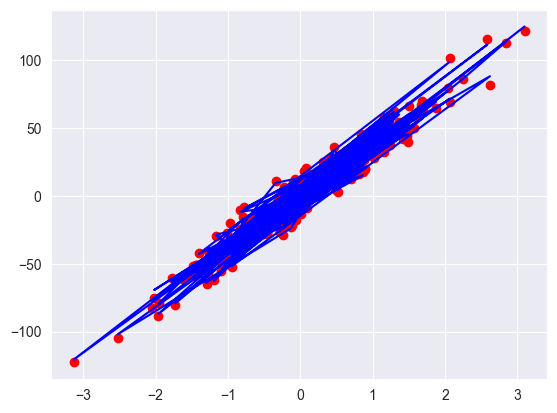

In [31]:

plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], y_pred, color = 'blue')   
plt.show()
